In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from autotroph_model import AutotrophModel
from autotroph_model import DEFAULT_ALPHA, DEFAULT_COUT, CELL_V
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from pprint import pprint

In [2]:
mkdir -p ../figures/sup_figs_model

In [3]:
# Consider a full range of rubisco rates/concentrations
gammas = np.logspace(-2,4,100)

c_pal = sns.color_palette('Greens_r')
h_pal = sns.color_palette('Purples_r')
b_pal = sns.color_palette('Blues_r')

{'a': 12000.0,
 'b': 0.015107104941530025,
 'c_out': 15,
 'cell_sa': 6,
 'cell_vol': 1.5,
 'd': 0.01,
 'flux_conversion_factor': 903.0,
 'g': array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-02,
       3.05385551e-02, 3.51119173e-02, 4.03701726e-02, 4.64158883e-02,
       5.33669923e-02, 6.13590727e-02, 7.05480231e-02, 8.11130831e-02,
       9.32603347e-02, 1.07226722e-01, 1.23284674e-01, 1.41747416e-01,
       1.62975083e-01, 1.87381742e-01, 2.15443469e-01, 2.47707636e-01,
       2.84803587e-01, 3.27454916e-01, 3.76493581e-01, 4.32876128e-01,
       4.97702356e-01, 5.72236766e-01, 6.57933225e-01, 7.56463328e-01,
       8.69749003e-01, 1.00000000e+00, 1.14975700e+00, 1.32194115e+00,
       1.51991108e+00, 1.74752840e+00, 2.00923300e+00, 2.31012970e+00,
       2.65608778e+00, 3.05385551e+00, 3.51119173e+00, 4.03701726e+00,
       4.64158883e+00, 5.33669923e+00, 6.13590727e+00, 7.05480231e+00,
      

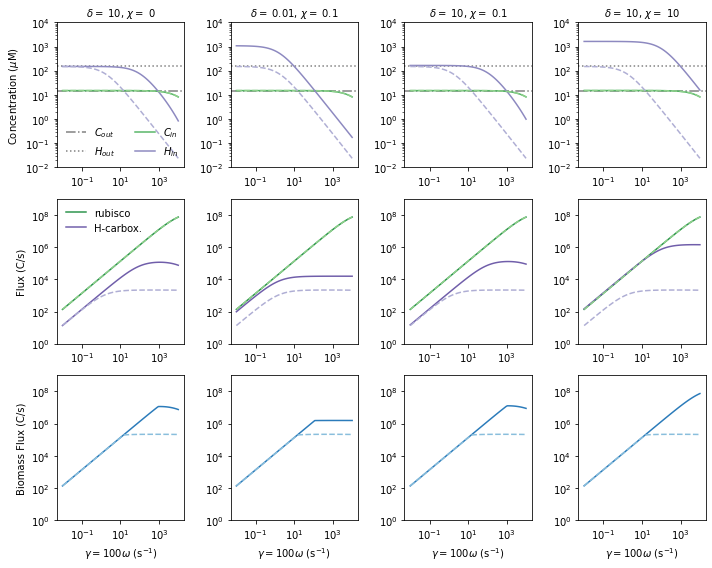

In [4]:
# Figure comparing "baseline" model to modifications +CA or Ci transport at various rates. 
# Base model has no Ci transport, spontaneous level of CA
base_model =  AutotrophModel(g=gammas, d=1e-2, x=0)
pprint(vars(base_model))

models = [
    # Modest CA level, no Ci transport
    AutotrophModel(g=gammas, d=10, x=0),
    # Spontaneous CA level, some Ci transport
    AutotrophModel(g=gammas, d=1e-2, x=0.1),
    # Some Ci transport, intermediate level of CA
    AutotrophModel(g=gammas, d=10, x=0.1),
    # High Ci transport, intermediate level of CA
    AutotrophModel(g=gammas, d=10, x=10),
]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,8))

for i, m in enumerate(models):
    plt.sca(axs[0, i])
    plt.yscale('log')
    plt.ylim(1e-2, 1e4)
    
    title = '$\\delta =$ {0}, $\\chi =$ {1}'.format(m.d, m.x)
    plt.title(title, fontsize=10)
    
    # Plot modified model concentrations
    plt.axhline(m.c_out, color='gray', ls='-.', label='$C_{out}$')
    plt.axhline(m.h_out, color='gray', ls=':', label='$H_{out}$')

    plt.loglog(gammas, m.C_in(), color=c_pal[2], label='$C_{in}$')
    plt.loglog(gammas, m.H_in(), color=h_pal[2], label='$H_{in}$')
    
    # Plot base model concentrations
    plt.loglog(gammas, base_model.C_in(), ls='--', color=c_pal[-3])
    plt.loglog(gammas, base_model.H_in(), ls='--', color=h_pal[-3])

    if i == 0:
        plt.legend(frameon=False, ncol=2)
        plt.ylabel('Concentration ($\mu$M)')

    plt.sca(axs[1, i])
    plt.yscale('log')
    plt.ylim(1, 1e9)
    
    # Plot modified model fluxes
    plt.loglog(gammas, m.rubisco_flux_C_per_s(), color=c_pal[1], label='rubisco')
    plt.loglog(gammas, m.hcarb_flux_C_per_s(), color=h_pal[1], label='H-carbox.')
    
    # Plot base model fluxes
    plt.loglog(gammas, base_model.rubisco_flux_C_per_s(), ls='--', color=c_pal[-3])
    plt.loglog(gammas, base_model.hcarb_flux_C_per_s(), ls='--', color=h_pal[-3])
    
    if i == 0:
        plt.legend(frameon=False)
        plt.ylabel('Flux (C/s)')
        
    plt.sca(axs[2, i])
    plt.yscale('log')
    plt.ylim(1, 1e9)
    
    # Plot modified model fluxes
    plt.loglog(gammas, m.biomass_flux_C_per_s(), color=b_pal[1])
    
    # Plot base model fluxes
    plt.loglog(gammas, base_model.biomass_flux_C_per_s(), ls='--', color=b_pal[-3])
    
    if i == 0:
        plt.ylabel('Biomass Flux (C/s)')
        
    plt.xlabel('$\gamma = 100 \omega$ (s$^{-1}$)')

plt.tight_layout()
plt.savefig('../figures/sup_figs_model/CA_Ci_effects_base.png', dpi=600, facecolor='w')
plt.show()

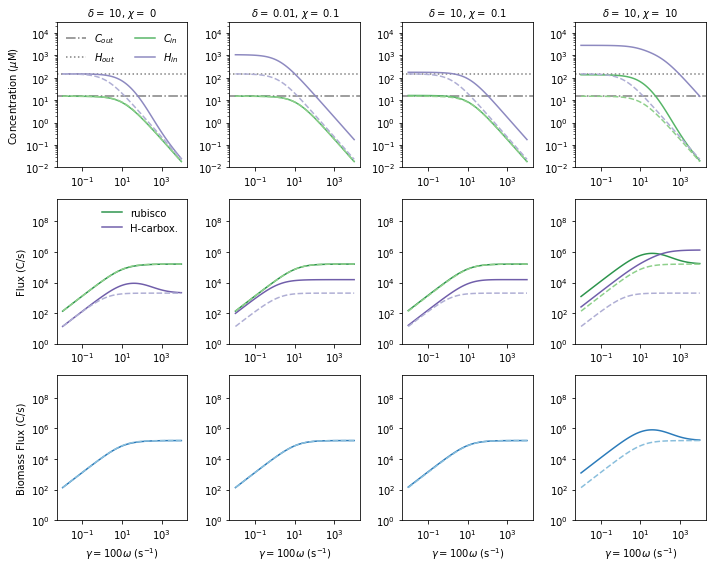

In [5]:
alpha = DEFAULT_ALPHA/1000

# Base model has no Ci transport, spontaneous level of CA
base_model =  AutotrophModel(g=gammas, d=1e-2, x=0, a=alpha)

models = [
    # Modest CA level, no Ci transport
    AutotrophModel(g=gammas, d=10, x=0, a=alpha),
    # Spontaneous CA level, some Ci transport
    AutotrophModel(g=gammas, d=1e-2, x=0.1, a=alpha),
    # Some Ci transport, intermediate level of CA
    AutotrophModel(g=gammas, d=10, x=0.1, a=alpha),
    # High Ci transport, intermediate level of CA
    AutotrophModel(g=gammas, d=10, x=10, a=alpha),
]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,8))
for i, m in enumerate(models):
    plt.sca(axs[0, i])
    plt.yscale('log')
    plt.ylim(1e-2, 3e4)
    
    title = '$\\delta =$ {0}, $\\chi =$ {1}'.format(m.d, m.x)
    plt.title(title, fontsize=10)
    
    # Plot modified model concentrations
    plt.axhline(m.c_out, color='gray', ls='-.', label='$C_{out}$')
    plt.axhline(m.h_out, color='gray', ls=':', label='$H_{out}$')

    plt.loglog(gammas, m.C_in(), color=c_pal[2], label='$C_{in}$')
    plt.loglog(gammas, m.H_in(), color=h_pal[2], label='$H_{in}$')
    
    # Plot base model concentrations
    plt.loglog(gammas, base_model.C_in(), ls='--', color=c_pal[-3])
    plt.loglog(gammas, base_model.H_in(), ls='--', color=h_pal[-3])

    if i == 0:
        plt.legend(frameon=False, ncol=2)
        plt.ylabel('Concentration ($\mu$M)')

    plt.sca(axs[1, i])
    plt.yscale('log')
    plt.ylim(1, 3e9)
    
    # Plot modified model fluxes
    plt.loglog(gammas, m.rubisco_flux_C_per_s(), color=c_pal[1], label='rubisco')
    plt.loglog(gammas, m.hcarb_flux_C_per_s(), color=h_pal[1], label='H-carbox.')
    
    # Plot base model fluxes
    plt.loglog(gammas, base_model.rubisco_flux_C_per_s(), ls='--', color=c_pal[-3])
    plt.loglog(gammas, base_model.hcarb_flux_C_per_s(), ls='--', color=h_pal[-3])
    
    if i == 0:
        plt.legend(frameon=False)
        plt.ylabel('Flux (C/s)')
        
    plt.sca(axs[2, i])
    plt.yscale('log')
    plt.ylim(1, 3e9)
    
    # Plot modified model fluxes
    plt.loglog(gammas, m.biomass_flux_C_per_s(), color=b_pal[1])
    
    # Plot base model fluxes
    plt.loglog(gammas, base_model.biomass_flux_C_per_s(), ls='--', color=b_pal[-3])
    
    if i == 0:
        plt.ylabel('Biomass Flux (C/s)')
        
    plt.xlabel('$\gamma = 100 \omega$ (s$^{-1}$)')

plt.tight_layout()
plt.savefig('../figures/sup_figs_model/CA_Ci_effects_lower_alpha.png', dpi=600, facecolor='w')
plt.show()

In [6]:
my_alphas = np.logspace(-3, 3, 100)
my_gammas = np.logspace(-2, 4, 100)

# For saving ratio of C_in/C_out
result_mats = []

ds = [0.01, 1, 10, 100]
xs = [0, 1, 10, 100]

for ax_idx, (d, x) in enumerate(zip(ds, xs)):
    res = np.zeros((100,100))
    for i, g in enumerate(my_gammas):
        for j, a in enumerate(my_alphas):
            m = AutotrophModel(a=a, g=g, d=d, x=x)
            res[i, j] = m.C_in()/m.c_out
    
    result_mats.append(res)

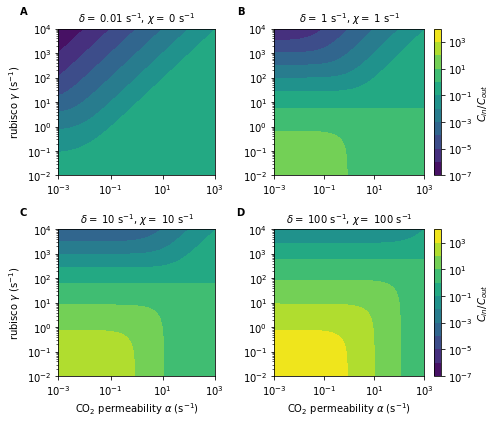

In [7]:
lb = np.min([m.min() for m in result_mats])
ub = np.max([m.max() for m in result_mats])
lnorm = LogNorm(lb, ub)
    
# pcolor documentation reads:
# the column index corresponds to the x-coordinate
# and the row index corresponds to y.
fig, axs = plt.subplots(figsize=(7,6), ncols=2, nrows=2, gridspec_kw=dict(width_ratios=[1,1.2]))
flat_axs = axs.flatten()
for ax_idx, (d, x) in enumerate(zip(ds, xs)):
    plt.sca(flat_axs[ax_idx])
    plt.yscale('log')
    plt.xscale('log')
    res_mat = result_mats[ax_idx]
    levels = np.logspace(-7, 4, 12)
    plt.contourf(my_alphas, my_gammas, res_mat, norm=lnorm, cmap='viridis', levels=levels)
    
    if ax_idx % 2 == 1:
        plt.colorbar(label='$C_{in} / C_{out}$')
    if ax_idx % 2 == 0:
        plt.ylabel('rubisco $\\gamma$ (s$^{-1}$)', fontsize=10)
    if ax_idx > 1:
        plt.xlabel('CO$_2$ permeability $\\alpha$ (s$^{-1}$)', fontsize=10)
    
    plt.title('$\\delta =$ {0} s$^{{-1}}$, $\\chi =$ {1} s$^{{-1}}$'.format(d, x), fontsize=10)

    
labels = 'ABCD'
for ax, label in zip(flat_axs, labels):
    ax.text(-0.2, 1.15, label, transform=ax.transAxes,
            fontsize=10, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.savefig('../figures/sup_figs_model/CO2_pump_regime.png', dpi=600, facecolor='w')
plt.show()